# PROGRAMMING FOR DATA ANALYSIS PROJECT

In [ ]:
#### Sources

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 
http://www3.dsi.uminho.pt/pcortez/student.pdf
 These two sources were very useful.  I found my dataset in the first source and used the second to find out how the Cortez & Silva
study related to predicting success in education by examining variables in the students' lives.

http://uis.unesco.org/country/PT
    Provides data of population of Portugal broken down by age.
    
https://www.oecd-ilibrary.org/docserver/9789264117020-4-en.pdf
    Provided me with information about Portugese school system.
   
https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
    This source helped me to tidy up the dataset into the columns and rows I wanted to keep.

https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/
    This source helped me to find a way to display all the data in the dataset.
    
https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/
    This source was very useful with appropriate functions to interpret the data.

https://seaborn.pydata.org/
    This source helped me to use correct syntax to plot my data.  It was also excellent to help me choose which plots to use.

I predict there is a link between the variables; school attendance, mother's education, father's education, plans to attend 
higher education and achievement.  I will use the dataset produced by Cortez and Silva which includes these variables among others.
First I will import the dataset and eliminate the other variables until I have the ones I want to investigate.  

In [1]:
import pandas as pd

# The dataset was in a zipped file so I had to unzip it, save it to my local machine and then read the filename into
# Jupyter.  The file was not saved using commas as delimiters so I added the parameter delimiter = ; so Pandas could
# organise the information into a separated file of rows and columns.  The folder is saved as student with the other files
# relating to this project.  This folder has four files from which I have chosen the file to do with achievement in maths.

dfgrade = pd.read_csv("student/student-mat.csv", delimiter=";")
# Check if data is correct class
print(type(dfgrade))

# Check the types of data; object, int etc.
dfgrade.dtypes

# Show the full dataframe
print(dfgrade)

<class 'pandas.core.frame.DataFrame'>
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famr

In [2]:
import pandas as pd

dfgrade = pd.read_csv("student/student-mat.csv", delimiter=";")


# Use the drop function to take all the columns out which I will not be using.
dfgrade = dfgrade.drop(["school", "sex", "age", "address","famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "traveltime", 
              "studytime", "failures", "schoolsup", "famsup", "paid", "activities", "nursery", "internet", 
              "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health"], axis=1)


# Having crosstabulated all the data there is a large number of students who got
# 0 as their final grade (G3).  I am going to take this group out of the cohort
# because they are skewing the statistics.  I assume for one reason or another they
# did not take the final exam.  I found this out further down and came back to this cell.
dfgrade = dfgrade.drop([128, 130, 131, 134, 135, 136, 136, 137, 140, 144, 146, 148,
            150, 153, 160, 162, 168, 170, 173, 221, 239, 242, 244,
        259, 264, 269, 296, 310, 316, 332, 333, 334, 337,
        341, 367, 387, 389])


# Show the new dataframe, it now has 359 rows and 7 columns.
# Show the maximum number of rows which are displayed
pd.set_option("display.max_rows", None)
print(dfgrade)

     Medu  Fedu higher  absences  G1  G2  G3
0       4     4    yes         6   5   6   6
1       1     1    yes         4   5   5   6
2       1     1    yes        10   7   8  10
3       4     2    yes         2  15  14  15
4       3     3    yes         4   6  10  10
5       4     3    yes        10  15  15  15
6       2     2    yes         0  12  12  11
7       4     4    yes         6   6   5   6
8       3     2    yes         0  16  18  19
9       3     4    yes         0  14  15  15
10      4     4    yes         0  10   8   9
11      2     1    yes         4  10  12  12
12      4     4    yes         2  14  14  14
13      4     3    yes         2  10  10  11
14      2     2    yes         0  14  16  16
15      4     4    yes         4  14  14  14
16      4     4    yes         6  13  14  14
17      3     3    yes         4   8  10  10
18      3     2    yes        16   6   5   5
19      4     3    yes         4   8  10  10
20      4     3    yes         0  13  14  15
21      4 

In [3]:
# Information about the dataframe
dfgrade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 394
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Medu      359 non-null    int64 
 1   Fedu      359 non-null    int64 
 2   higher    359 non-null    object
 3   absences  359 non-null    int64 
 4   G1        359 non-null    int64 
 5   G2        359 non-null    int64 
 6   G3        359 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 22.4+ KB


In [4]:
# Statistical information about the variables
dfgrade.describe()

,Medu,Fedu,absences,G1,G2,G3
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.00000
mean,2.788301,2.540390,6.281337,11.247911,11.331476,11.45961
std,1.095841,1.084637,8.178283,3.245511,3.161197,3.33140
min,0.000000,0.000000,0.000000,3.000000,5.000000,0.00000
25%,2.000000,2.000000,2.000000,9.000000,9.000000,9.00000
50%,3.000000,3.000000,4.000000,11.000000,11.000000,11.00000
75%,4.000000,3.000000,8.000000,14.000000,13.500000,14.00000
max,4.000000,4.000000,75.000000,19.000000,19.000000,20.00000


In [5]:
# To examine one data point.
dfgrade.iloc[0:1,0:1]

,Medu
0,4


In [6]:
# To examine the data of one student at index 353
# This student has 2 parents who left school on or before age 9, he/she hopes
# to go to higher education, he/she has had 4 absences in the year and he/she
# has scored 8 out of 20 in the three tests that year, a failing grade.

dfgrade.set_index("Medu")
dfgrade.loc[(353)]

Medu          1
Fedu          1
higher      yes
absences      4
G1            8
G2            8
G3            8
Name: 353, dtype: object

In [7]:
# Define the type of data each column repreents.

print(dfgrade.columns)

Index(['Medu', 'Fedu', 'higher', 'absences', 'G1', 'G2', 'G3'], dtype='object')


In [8]:

# Use pandas to cross tabulate the final year grade G3 with mother's education

pd.crosstab(dfgrade["G3"], dfgrade["Medu"], margins = True)


Medu,0,1,2,3,4,All
G3,,,,,,
0,0,1,1,0,0,2
4,0,0,0,0,1,1
5,0,2,0,3,2,7
6,0,2,4,5,4,15
7,0,2,1,3,3,9
8,0,6,11,7,8,32
9,1,4,6,8,9,28
10,0,13,14,15,14,56
11,0,7,15,11,14,47


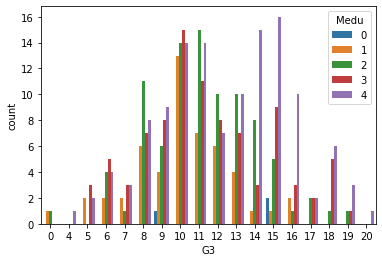

In [9]:
# Use seaborn to plot the data above to examine the relationship between mother's grade
# and child performance in school. A count plot can is a histogram across 
# a categorical, instead of quantitative, variable. 

import seaborn as sns

sns.countplot(x = "G3", hue="Medu", data = dfgrade);

# The plot clearly shows a high correlation between mother's education and the child's
# G3 school grade.  The purple bar represents mothers with 3rd level education and this
# bar is most highly correlated with children in the 14 - 20 grade scores.

In [10]:
# Use pandas to cross tabulate the final year grade G3 with father's education

pd.crosstab(dfgrade["Fedu"], dfgrade["G3"], margins = True)


G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
Fedu,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2
1,1,0,1,5,5,8,5,16,6,8,5,4,3,3,0,2,0,0,72
2,1,0,3,4,1,8,9,14,17,8,9,8,12,4,0,2,3,0,103
3,0,1,1,3,1,12,9,18,11,7,8,4,8,4,2,4,0,1,94
4,0,0,2,3,2,4,5,7,13,8,9,11,10,4,4,4,2,0,88
All,2,1,7,15,9,32,28,56,47,31,31,27,33,16,6,12,5,1,359


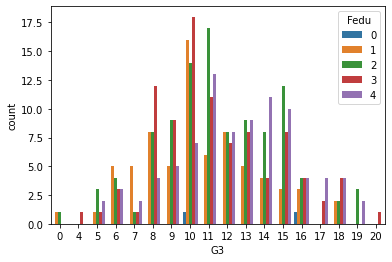

In [12]:
# Use seaborn to plot the data above to examine the relationship between father's grade
# and child performance in school.

import seaborn as sns

sns.countplot(x = "G3", hue="Fedu", data = dfgrade);

# The plot shows a medium correlation between father's education and the child's
# G3 school grade.  The purple bar represents fathers with 3rd level education and this
# bar is correlated with children in the 14 - 20 grade score.

In [13]:

# Show the cross tabulation of the G3 score with the number of days
# the student was absent from school.


pd.crosstab(dfgrade["absences"], dfgrade["G3"], margins = True)




G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
absences,,,,,,,,,,,,,,,,,,,
0,2,0,0,1,1,6,4,12,6,10,4,6,15,4,3,3,2,0,79
1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,3
2,0,0,1,1,1,6,3,10,12,5,6,5,6,5,1,3,0,0,65
3,0,0,0,0,1,1,0,0,3,1,0,0,0,2,0,0,0,0,8
4,0,0,0,5,0,2,5,13,8,3,3,6,4,2,0,1,0,1,53
5,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,5
6,0,0,0,2,2,1,1,6,3,2,5,5,1,0,0,2,1,0,31
7,0,0,0,1,0,1,1,0,0,0,0,2,1,0,1,0,0,0,7
8,0,0,1,1,0,2,2,7,2,2,2,2,0,0,0,1,0,0,22


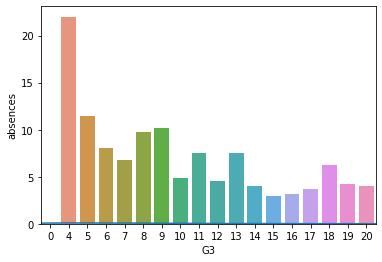

In [18]:
# Using seaborn barplot to demonstrate the correlation between the 
# number of absent days and the G3 grade the students scored.  The barchart
# shows clearly that students who missed 20+ days of school were
# mainly represented in the lower scores and students with 5 or fewer
# absence days are highly represented in the 14+ grade point scores. 

sns.barplot(x = "G3", y="absences", ci = None, data = dfgrade);

In [19]:
# This data cannot be said to be useful in predicting grades
# for students in maths.  Because this is a secondary school most
# students attending would intend to attend third level.  It seems
# that in the Portugese educational system it is normal to leave
# at 15 if you are not planning 3rd level.  Therefore it is safe to
# assume that those who go to secondary want to go to third level even
# if their grades do not make that a likely outcome.

pd.crosstab(dfgrade["higher"], ["G3"], margins = True)


col_0,G3,All
higher,,
no,14,14
yes,345,345
All,359,359


In [ ]:
# Dataset 359
# G3 1-20
# Medu 0-4
# Fedu 0-4
# Absences 0-75
        Medu 	     Fedu 	    absences 	G1 	        G2 	         G3
count 	359.000000 	359.000000 	359.000000 	359.000000 	359.000000 	359.00000
mean 	2.788301 	2.540390 	6.281337 	11.247911 	11.331476 	11.45961
std 	1.095841 	1.084637 	8.178283 	3.245511 	3.161197 	3.33140
min 	0.000000 	0.000000 	0.000000 	3.000000 	5.000000 	0.00000
25% 	2.000000 	2.000000 	2.000000 	9.000000 	9.000000 	9.00000
50% 	3.000000 	3.000000 	4.000000 	11.000000 	11.000000 	11.00000
75% 	4.000000 	3.000000 	8.000000 	14.000000 	13.500000 	14.00000
max 	4.000000 	4.000000 	75.000000 	19.000000 	19.000000 	20.00000

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

m, sd = 2.8,1.1
s = np.random.normal(1.1, 2.8, 365)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.show()